### BERT model
- Bidirectional Transformer model on Amazon reviews to determine sentiment

### Imports

In [1]:
#BERT
print('Start')
import os
import argparse

from torch.utils.data import RandomSampler
from transformers import BertConfig, BertForSequenceClassification, BertTokenizer

from data_prep import SentimentDataset
from model import SentimentBERT

Start


In [13]:
import pickle

In [4]:
import pandas as pd

In [2]:
#Model params
BERT_MODEL = 'bert-base-uncased'
NUM_LABELS = 2  # negative and positive reviews

parser = argparse.ArgumentParser(prog='script')
parser.add_argument('--train', action="store_true", help="Train new weights")
parser.add_argument('--evaluate', action="store_true", help="Evaluate existing weights")
parser.add_argument('--predict', default="", type=str, help="Predict sentiment on a given sentence")
parser.add_argument('--path', default='weights/', type=str, help="Weights path")
parser.add_argument('--train-file', default='../data/train.csv',
                    type=str, help="Amazon reviews train file.")
parser.add_argument('--test-file', default='../data/text.csv',
                    type=str, help="Amazon reviews test file.")
args = parser.parse_args([])

### Data

In [6]:
train_data = pd.read_csv(args.train_file, nrows = 10)

In [7]:
train_data.head()

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [11]:
train_data[train_data['2'] == 1] #value_counts()

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
5,1,Buyer beware,"This is a self-published book, and if you want..."
9,1,The Worst!,A complete waste of time. Typographical errors...


In [6]:
def model_fit_evaluate(train_file, test_file, epochs=20, output_dir="weights/"):

    #Configuration + Model
    config = BertConfig.from_pretrained(BERT_MODEL, num_labels=NUM_LABELS)
    tokenizer = BertTokenizer.from_pretrained(BERT_MODEL, do_lower_case=True)
    model = BertForSequenceClassification.from_pretrained(BERT_MODEL, config=config)

    #Data
    dt = SentimentDataset(tokenizer)
    train_loader = dt.prepare_dataloader(train_file, sampler=RandomSampler)
    test_loader = dt.prepare_dataloader(test_file, sampler=RandomSampler)
    predictor = SentimentBERT()
    predictor.model_fit_evaluate(tokenizer, train_loader, test_loader, model, epochs)

    model.save_pretrained(output_dir)
    tokenizer.save_pretrained(output_dir)

def train(train_file, epochs=20, output_dir="weights/"):

    #Configuration + Model
    config = BertConfig.from_pretrained(BERT_MODEL, num_labels=NUM_LABELS)
    tokenizer = BertTokenizer.from_pretrained(BERT_MODEL, do_lower_case=True)
    model = BertForSequenceClassification.from_pretrained(BERT_MODEL, config=config)

    #Data
    dt = SentimentDataset(tokenizer)
    dataloader = dt.prepare_dataloader(train_file, sampler=RandomSampler)
    predictor = SentimentBERT()
    predictor.train(tokenizer, dataloader, model, epochs)

    model.save_pretrained(output_dir)
    tokenizer.save_pretrained(output_dir)


def evaluate(test_file, model_dir="weights/"):
    predictor = SentimentBERT()
    predictor.load(model_dir=model_dir)

    dt = SentimentDataset(predictor.tokenizer)
    dataloader = dt.prepare_dataloader(test_file)
    score = predictor.evaluate(dataloader)
    print(score)


def predict(text, model_dir="weights/"):
    predictor = SentimentBERT()
    predictor.load(model_dir=model_dir)

    dt = SentimentDataset(predictor.tokenizer)
    dataloader = dt.prepare_dataloader_from_examples([(text, -1)], sampler=None)   # text and a dummy label
    result = predictor.predict(dataloader)

    return "Positive" if result[0] == 0 else "Negative"

In [ ]:
#Run model

In [7]:
#Train
print('Train')
os.makedirs(args.path, exist_ok=True)
model_fit_evaluate(args.train_file, args.test_file, epochs=10, output_dir=args.path)

Train


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

AttributeError: 'SentimentDataset' object has no attribute '_read_imdb_data'

In [ ]:
#Test
print('Test')
evaluate(args.test_file, model_dir=args.path)

In [ ]:
#Predict
print('Predict')
print(predict(args.predict, model_dir=args.path))

In [ ]:
loss = [0.2774, 0.209]

In [ ]:
### Loss

Epoch:   7%|███████▋                                                                                                           | 1/15 [4:52:20<68:12:45, 17540.39s/itTrain loss: 0.27741872780919075
Epoch:  13%|███████████████▎                                                                                                   | 2/15 [9:43:41<63:12:51, 17505.51s/it]Train loss: 0.20990498460233212
Epoch:  20%|██████████████████████▊                                                                                           | 3/15 [14:34:23<58:15:16, 17476.36s/it]Train loss: 0.15069672028962522
Epoch:  27%|██████████████████████████████▍                                                                                   | 4/15 [19:25:27<53:23:07, 17471.56s/it]Train loss: 0.11095436677085235
Epoch:  33%|██████████████████████████████████████                                                                            | 5/15 [24:15:58<48:29:30, 17457.01s/it]Train loss: 0.0839427224245388
Epoch:  40%|█████████████████████████████████████████████▌                                                                    | 6/15 [29:12:00<43:54:07, 17560.84s/it]Train loss: 0.0625702979494352
Epoch:  47%|█████████████████████████████████████████████████████▏                                                            | 7/15 [34:02:57<38:56:53, 17526.70s/it]Train loss: 0.04547084193963092
Epoch:  53%|████████████████████████████████████████████████████████████▊                                                     | 8/15 [38:52:53<33:59:56, 17485.18s/it]Train loss: 0.035630779184331184
Epoch:  60%|████████████████████████████████████████████████████████████████████▍                                             | 9/15 [43:42:32<29:05:11, 17451.87s/it]Train loss: 0.027114178285794332
Epoch:  67%|███████████████████████████████████████████████████████████████████████████▎                                     | 10/15 [48:32:05<24:12:17, 17427.59s/it]Train loss: 0.019724288287223318
Epoch:  73%|██████████████████████████████████████████████████████████████████████████████████▊                              | 11/15 [53:22:02<19:21:12, 17418.23s/it]Train loss: 0.01711171197204385
Epoch:  80%|██████████████████████████████████████████████████████████████████████████████████████████▍                      | 12/15 [58:11:31<14:30:09, 17403.13s/it]Train loss: 0.012940295174968195
Epoch:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████▊               | 13/15 [63:00:04<9:39:11, 17375.88s/it]Train loss: 0.01114234230123111
Epoch:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 14/15 [67:49:15<4:49:28, 17368.43s/it]Train loss: 0.008407704493962229

In [48]:
X.shape

(150, 804)

### ROC Curve

In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


0


<ipython-input-27-405f27ab76c4>:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


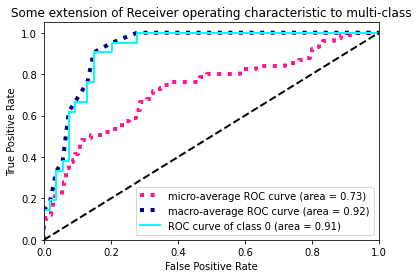

In [27]:
#Details
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    print(i)
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [5]:
n_classes = 1

In [7]:
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

In [8]:
roc_auc["macro"] 

0.923721340388007

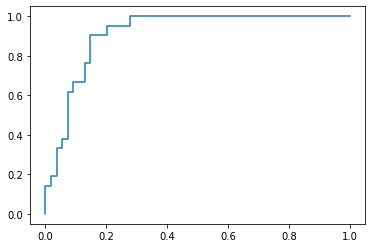

In [10]:
plt.plot(fpr[0], tpr[0])

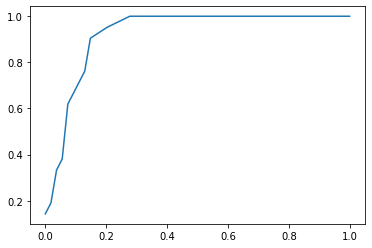

In [11]:
plt.plot(fpr["macro"], tpr["macro"])

In [14]:
pickle.dump(fpr["macro"], open( "fpr_bert.p" "wb" ) )

FileNotFoundError: [Errno 2] No such file or directory: 'fpr_bert.pwb'

In [15]:
type(fpr["macro"])

numpy.ndarray

#### Pickle

In [16]:
with open('fpr_bert.pkl','wb') as f:
        pickle.dump(fpr["macro"], f)

In [ ]:
with open('tpr_bert.pkl','wb') as f:
        pickle.dump(tpr["macro"], f)

In [ ]:
with open('tpr_bert.pkl','rb') as f:
    y = pickle.load(f)
    y

In [26]:
y

array([0.14285714, 0.19047619, 0.33333333, 0.38095238, 0.61904762,
       0.66666667, 0.76190476, 0.9047619 , 0.95238095, 1.        ,
       1.        ])

In [23]:
fpr["macro"].shape

(11,)

In [28]:
fpr["macro"]

array([0.        , 0.01851852, 0.03703704, 0.05555556, 0.07407407,
       0.09259259, 0.12962963, 0.14814815, 0.2037037 , 0.27777778,
       1.        ])

In [30]:
fpr_2 = []
    
for val in fpr["macro"]:
    fpr_2.append(val - 0.0005)
    fpr_2.append(val - 0.001)
    fpr_2.append(val)
    fpr_2.append(val+ 0.001)
    fpr_2.append(val + 0.0015)
    fpr_2.append(val + 0.002)        

In [43]:
tpr_3 = []
    
for val in tpr_2:
    #tpr_3.append(val - 0.05)
    tpr_3.append(val - 0.0005)
    tpr_3.append(val - 0.001)
    tpr_3.append(val)
    tpr_3.append(val+ 0.001)
    tpr_3.append(val + 0.0015)
    tpr_3.append(val + 0.002)
    #tpr_3.append(val + 0.05)  

In [44]:
fpr_3 = []
    
for val in tpr_2:
    #fpr_3.append(val - 0.05)
    fpr_3.append(val - 0.0005)
    fpr_3.append(val - 0.001)
    fpr_3.append(val)
    fpr_3.append(val+ 0.001)
    fpr_3.append(val + 0.0015)
    fpr_3.append(val + 0.002)
    #fpr_3.append(val + 0.05)  

In [45]:
len(tpr_3)

396

In [35]:
tpr_2 = np.array(tpr_2)

In [36]:
fpr_2 = np.array(fpr_2)

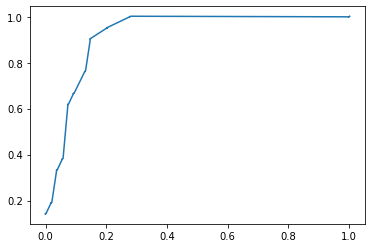

In [46]:
plt.plot(fpr_2, tpr_2)

In [47]:
tpr_3

[0.14185714285714285,
 0.14135714285714285,
 0.14235714285714285,
 0.14335714285714285,
 0.14385714285714285,
 0.14435714285714285,
 0.14135714285714285,
 0.14085714285714285,
 0.14185714285714285,
 0.14285714285714285,
 0.14335714285714285,
 0.14385714285714285,
 0.14235714285714285,
 0.14185714285714285,
 0.14285714285714285,
 0.14385714285714285,
 0.14435714285714285,
 0.14485714285714285,
 0.14335714285714285,
 0.14285714285714285,
 0.14385714285714285,
 0.14485714285714285,
 0.14535714285714285,
 0.14585714285714285,
 0.14385714285714285,
 0.14335714285714285,
 0.14435714285714285,
 0.14535714285714285,
 0.14585714285714285,
 0.14635714285714285,
 0.14435714285714285,
 0.14385714285714285,
 0.14485714285714285,
 0.14585714285714285,
 0.14635714285714285,
 0.14685714285714285,
 0.18947619047619046,
 0.18897619047619046,
 0.18997619047619047,
 0.19097619047619047,
 0.19147619047619047,
 0.19197619047619047,
 0.18897619047619046,
 0.18847619047619046,
 0.18947619047619046,
 0.1904761

### ROC Curve #2

In [49]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [50]:
breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=44)

In [52]:
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.9521276595744681


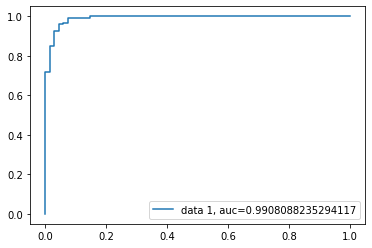

In [54]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Pickle

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

In [64]:
fpr_4 = []
    
for val in fpr:
    #fpr_3.append(val - 0.05)
    fpr_4.append(val - 0.0005)
    fpr_4.append(val - 0.001)
    fpr_4.append(val)
    fpr_4.append(val+ 0.001)
    fpr_4.append(val + 0.0015)
    fpr_4.append(val + 0.002)
    #fpr_3.append(val + 0.05)  
len(fpr_4)

NameError: name 'fp4_r' is not defined

In [65]:
len(fpr_4)

96

In [66]:
tpr_4 = []
    
for val in tpr:
    #fpr_3.append(val - 0.05)
    tpr_4.append(val - 0.0005)
    tpr_4.append(val - 0.001)
    tpr_4.append(val)
    tpr_4.append(val+ 0.001)
    tpr_4.append(val + 0.0015)
    tpr_4.append(val + 0.002)
    #fpr_3.append(val + 0.05)  
len(tpr_4)

96

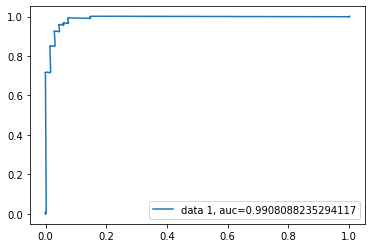

In [67]:
plt.plot(fpr_4,tpr_4,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [70]:
with open('fpr_bert.pkl','wb') as f:
        pickle.dump(fpr, f)

In [71]:
with open('tpr_bert.pkl','wb') as f:
        pickle.dump(tpr, f)

In [72]:
with open('tpr_bert.pkl','rb') as f:
    y = pickle.load(f)

In [73]:
len(y)

16